In [2]:
# import the necessary packages
import cv2
import numpy as np
from PIL import Image
import sys
import get_image
import datetime
import time

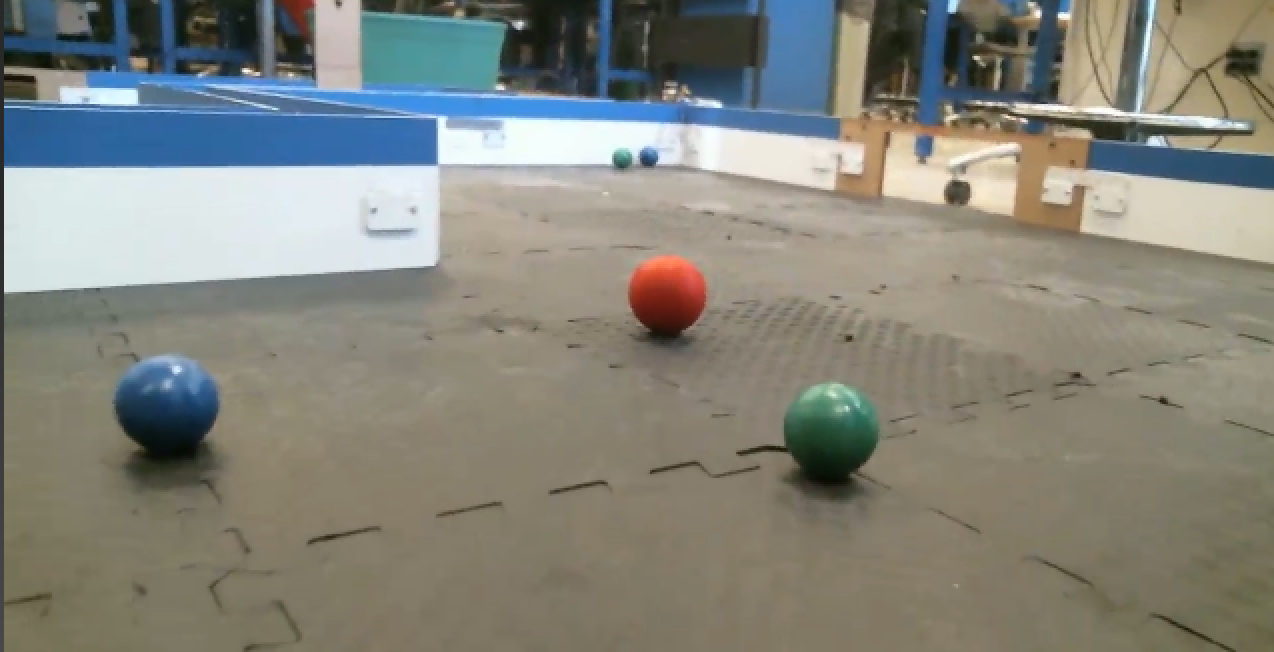

In [12]:
#raw_img = Image.open("/home/maslab/opencv/old_scripts/red_image.png")
raw_img = Image.open("/home/maslab/opencv/images/arena_balls_2.png")
Image.fromarray(np.array(raw_img))

In [13]:
# raw_img = np.array(raw_img)[175:,:450]
raw_img = np.array(raw_img)
img = raw_img.astype(np.float32).copy()
# rgb from PIL, bgr from opencv
mask = (img[:,:,2] > 1.3*img[:,:,1]) & (img[:,:,2] > 1.3*img[:,:,0])
img[:,:,1] = 0
img[:,:,0] = 0
np.place(img[:,:,2], mask, 255)
np.place(img[:,:,2], 1-mask, 0)

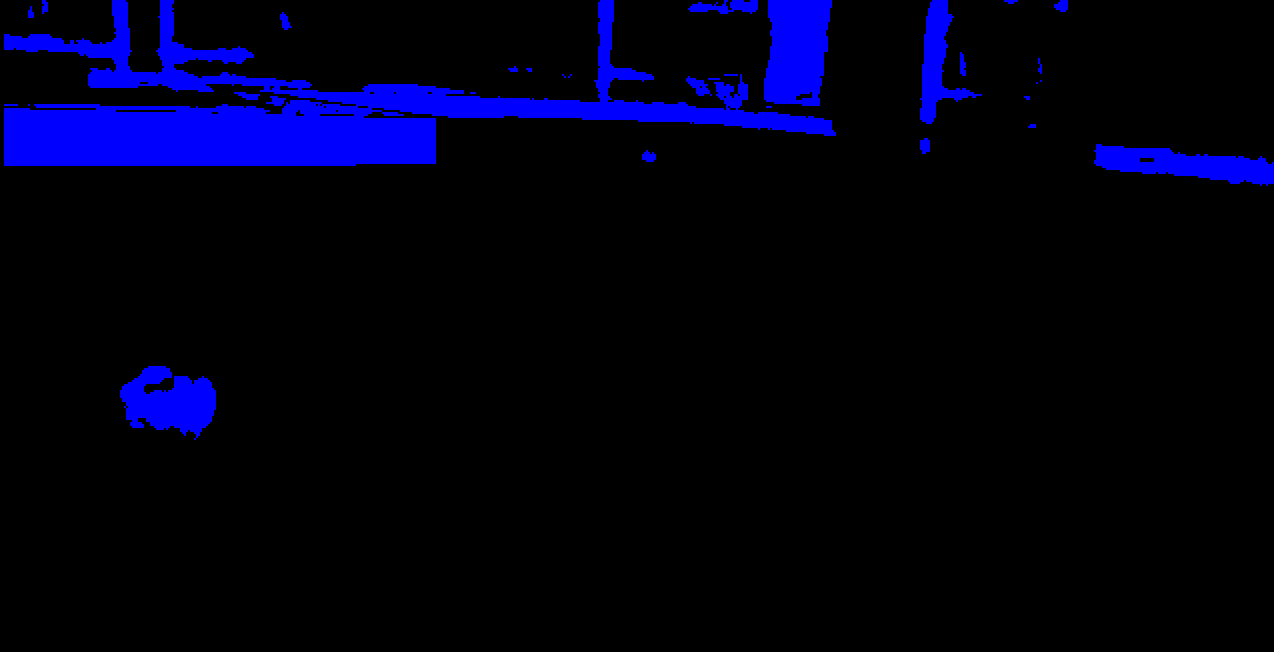

In [14]:
Image.fromarray(img.astype(np.uint8))

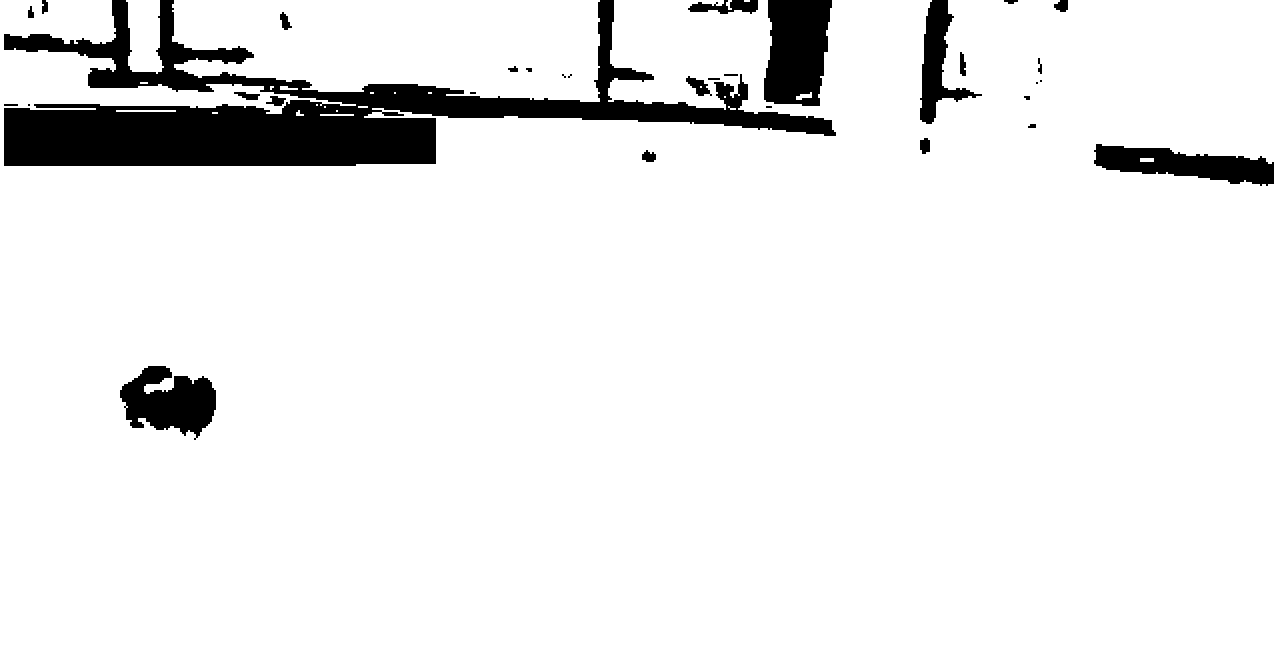

In [15]:
new_im =  ((1-mask)*255).astype(np.uint8)
Image.fromarray(new_im)

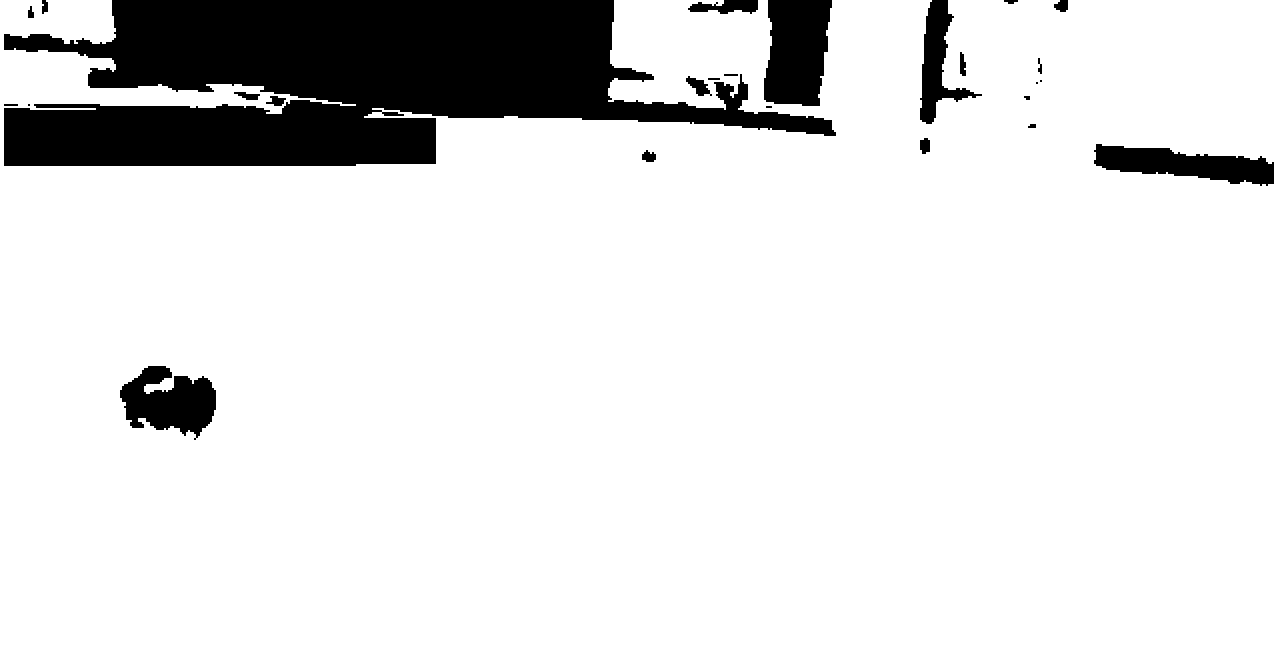

In [16]:
# flood fill algorithm for the balls
th, im_th = cv2.threshold(new_im, 220, 255, cv2.THRESH_BINARY_INV)
# im_th is white ball and black background
im_floodfill = im_th.copy()
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(im_floodfill, mask, (0,0), 255)
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = im_th | im_floodfill_inv
im_out = cv2.bitwise_not(im_out)
Image.fromarray(im_out)

In [21]:
#################################################################################################
# Set up the detector with custom parameters.
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
#params.minThreshold = 10
#params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 100
params.maxArea = 100000 # 100,000 seems to work well

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.65
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.01
params.filterByColor = False
params.blobColor = 255
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector(params)
#detector = cv2.SimpleBlobDetector()

number of detected blobs  7


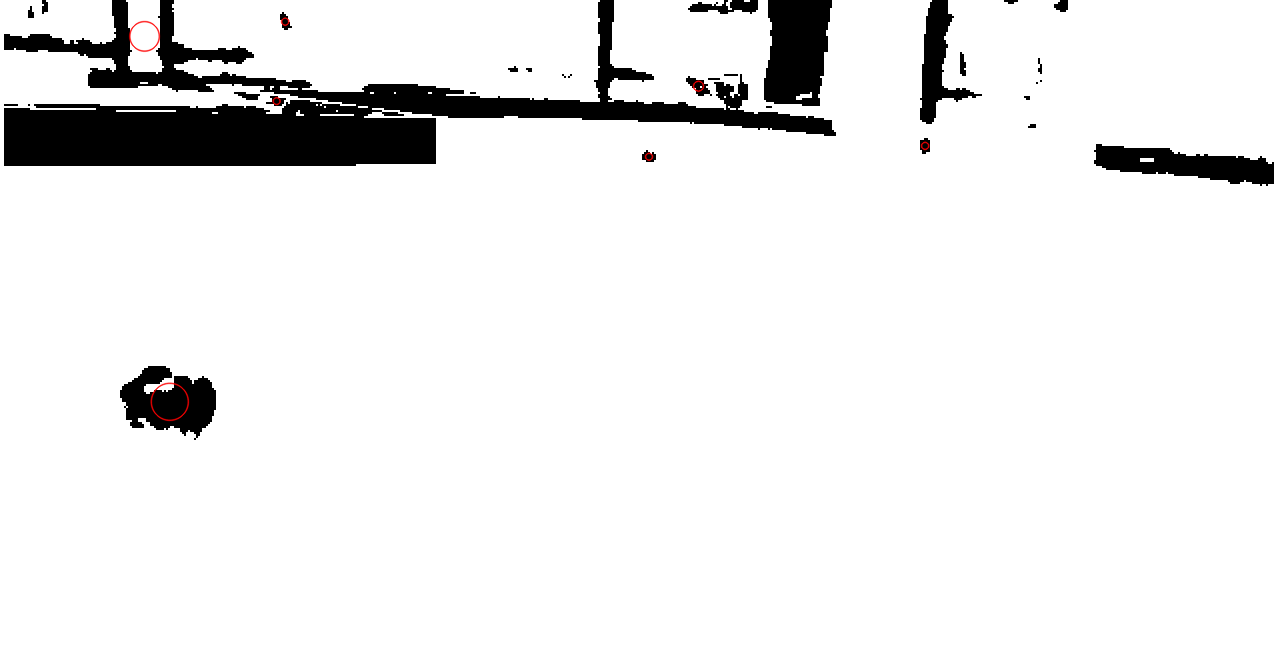

In [22]:
#################################################################################################
# Detect blobs.
keypoints = detector.detect(new_im)
print "number of detected blobs ", len(keypoints)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(new_im, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
# cv2.imshow("Keypoints", im_with_keypoints)
Image.fromarray(im_with_keypoints)